In [127]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score

# General Information about Data Sets

In [2]:
data= pd.read_csv('data.csv')

In [3]:
data.head()

,Cool_25,Heat_25,Depart,PrecipTotal,ResultDir,Species_CULEX PIPIENS,Species_CULEX RESTUANS,WnvPresent
0,3.33,2.92,10.0,0.0,17.0,0,0,0
1,3.33,2.92,10.0,0.0,17.0,0,1,0
2,3.33,2.92,10.0,0.0,17.0,0,1,0
3,3.33,2.92,10.0,0.0,17.0,0,0,0
4,3.33,2.92,10.0,0.0,17.0,0,1,0


In [4]:
data['WnvPresent'].value_counts()/len(data['WnvPresent'])*100   # IMBALANCED DATA

0    94.810688
1     5.189312
Name: WnvPresent, dtype: float64

Train-Test Split

In [5]:
X= data.drop('WnvPresent', axis=1)
y=data['WnvPresent']

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.30, random_state=42)

In [33]:
print(X_train.shape, y_train.shape)

(6785, 7) (6785,)


In [29]:
X_train.head()

,Cool_25,Heat_25,Depart,PrecipTotal,ResultDir,Species_CULEX PIPIENS,Species_CULEX RESTUANS
1729,11.87,0.01,4.0,0.530,6.5,1,0
3305,0.74,4.67,-10.0,0.090,3.0,0,1
5316,1.88,3.64,-8.0,0.740,13.0,0,1
7584,4.56,1.88,5.0,0.450,19.0,0,1
6179,14.81,0.15,7.0,0.005,33.5,0,0


In [34]:
y_test.value_counts()

0    2750
1     158
Name: WnvPresent, dtype: int64

In [96]:
def model_evaluation(model,params,avg):
    
    pipe = make_pipeline(StandardScaler(),model)
    model_ran = RandomizedSearchCV(pipe,params,cv=5, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
    model_ran = model_ran.fit(X_train,y_train)
    y_pred = model_ran.predict(X_test)
    y_pred_proba = model_ran.predict_proba(X_test)[:,1]
    f1 = f1_score(y_test, y_pred, average= avg)
    cm = confusion_matrix(y_test, y_pred)
    roc= roc_auc_score(y_test, y_pred_proba)
    print('F1-score: ' , round(f1,4))
    print("Best Score: " , round(model_ran.best_score_,4))
    print("ROC AUC:", round(roc,4), '\n')
    print("Best Parameters: " , model_ran.best_params_)
    print("Confusion Matrix: " ,'\n', cm, '\n')
    print("Classsification Report: ",'\n', classification_report(y_test, y_pred))
    y_pred_proba=model_ran.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    

# Random Forest 

F1-score:  0.0
Best Score:  0.8095
ROC AUC: 0.8255 

Best Parameters:  {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__criterion': 'gini'}
Confusion Matrix:  
 [[2750    0]
 [ 158    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2750
           1       0.00      0.00      0.00       158

    accuracy                           0.95      2908
   macro avg       0.47      0.50      0.49      2908
weighted avg       0.89      0.95      0.92      2908



C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


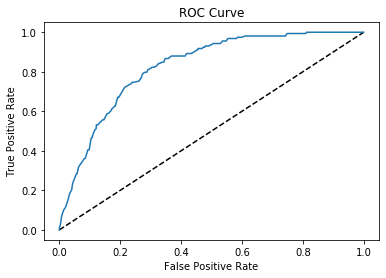

In [97]:
# f1_score >> average='binary'
params= { 'randomforestclassifier__n_estimators': [500,600,800,1000,1500,2000,3000], 
             'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'], 
             'randomforestclassifier__max_depth' :  np.arange(4,9), 
             'randomforestclassifier__criterion' :['gini', 'entropy'],
            'randomforestclassifier__min_samples_split' : [2, 3, 4] }
avg= 'binary'

model_evaluation(RandomForestClassifier(), params, avg)

F1-score:  0.9193
Best Score:  0.8099
ROC AUC: 0.8265 

Best Parameters:  {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__criterion': 'gini'}
Confusion Matrix:  
 [[2750    0]
 [ 158    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2750
           1       0.00      0.00      0.00       158

    accuracy                           0.95      2908
   macro avg       0.47      0.50      0.49      2908
weighted avg       0.89      0.95      0.92      2908



C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


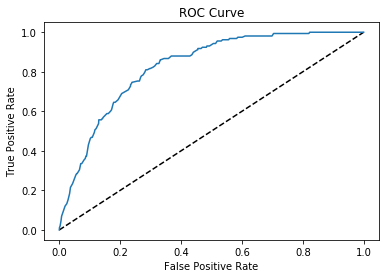

In [98]:
# f1_score >> average='weighted'

params= { 'randomforestclassifier__n_estimators': [500,600,800,1000,1500,2000,3000], 
             'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'], 
             'randomforestclassifier__max_depth' :  np.arange(4,9), 
             'randomforestclassifier__criterion' :['gini', 'entropy'],
            'randomforestclassifier__min_samples_split' : [2, 3, 4] }
avg= 'weighted'

model_evaluation(RandomForestClassifier(), params, avg)

# Logistic Regression

F1-score:  0.1767
Best Score:  0.7343
ROC AUC: 0.7385 

Best Parameters:  {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 48.0}
Confusion Matrix:  
 [[1639 1111]
 [  35  123]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.98      0.60      0.74      2750
           1       0.10      0.78      0.18       158

    accuracy                           0.61      2908
   macro avg       0.54      0.69      0.46      2908
weighted avg       0.93      0.61      0.71      2908



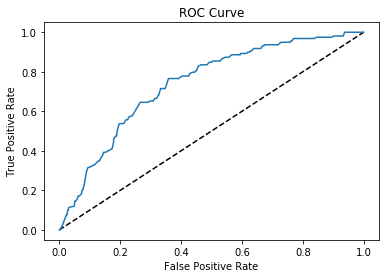

In [112]:
log_reg_params={'logisticregression__penalty': ['l1','l2','elasticnet'], 'logisticregression__class_weight':['balanced'] , 
                'logisticregression__C':np.arange(0.5, 100.0, 0.5) }
avg= 'binary'
log_reg = LogisticRegression()
model_evaluation(log_reg,log_reg_params,avg)

# KNN 

F1-score:  0.0
Best Score:  0.781
ROC AUC: 0.8142 

Best Parameters:  {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 174, 'kneighborsclassifier__leaf_size': 8}
Confusion Matrix:  
 [[2750    0]
 [ 158    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2750
           1       0.00      0.00      0.00       158

    accuracy                           0.95      2908
   macro avg       0.47      0.50      0.49      2908
weighted avg       0.89      0.95      0.92      2908



C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


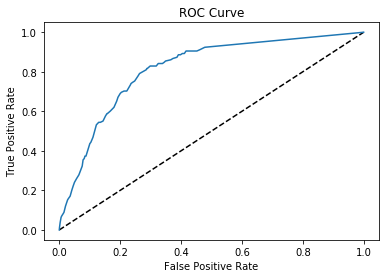

In [120]:
knn_params = {'kneighborsclassifier__leaf_size': np.arange(1,50), 
               'kneighborsclassifier__n_neighbors': np.arange(1,200),'kneighborsclassifier__p':[1,2],
             'kneighborsclassifier__weights': ['uniform', 'distance'] }
avg= 'binary'
knn= KNeighborsClassifier()
model_evaluation(knn,knn_params,avg)                                                 

# Gradient Boosting

F1-score:  0.0
Best Score:  0.815
ROC AUC: 0.8301 

Best Parameters:  {'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.25}
Confusion Matrix:  
 [[2750    0]
 [ 158    0]] 

Classsification Report:  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2750
           1       0.00      0.00      0.00       158

    accuracy                           0.95      2908
   macro avg       0.47      0.50      0.49      2908
weighted avg       0.89      0.95      0.92      2908



C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


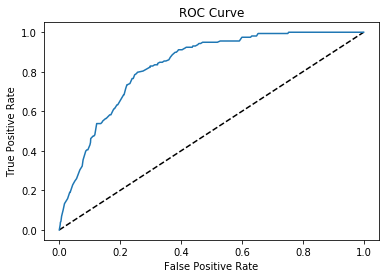

In [124]:
gb_params= {'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1], 
            'gradientboostingclassifier__n_estimators': [100,200,300,500],
            'gradientboostingclassifier__max_depth':np.arange(3,9),
          'gradientboostingclassifier__max_features': ['auto', 'sqrt', 'log2']}

avg= 'binary'

model_evaluation(GradientBoostingClassifier(), gb_params, avg)